import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run /Users/yaoyao/Documents/datascience/toolbox/toolbox1_dataview.ipynb
%matplotlib inline

In [5]:
with open('specs.csv') as f:
    specs = pd.read_csv(f)
with open('train_labels.csv') as f:
    train_labels = pd.read_csv(f)
with open('train.csv') as f:
    train = pd.read_csv(f)

In [ ]:
with open('test.csv') as f:
    testset = pd.read_csv(f)

# notes:
1.training set and test set has no common installation_id, means no same kids
2.we need to predict the last assesment attempes count, so we need to build a training set
3.each unique game through has a unique game session
4.x[x['event_code'] == 4110].event_data.count() to find how many attempts
train data and test data:
type == assessment
time series prediction:
extract paras from previous history, input to model, to predict future.
use train to predict train,use test to predict test.
possible features:
game played before? 1/0
1: before accuracy group,before time
0: other game played? accuracy group, before time, etc

# First, Let's try to understand what the data is saying

## take an installation id event as an example

In [124]:
event_label = train_labels[train_labels['installation_id'] == '0006a69f']

In [125]:
# grep the event from the training dataset
event = train[train['installation_id'] == '0006a69f']

In [130]:
event_label
event.groupby(['game_session']).count()
# we have way more game sessions displayed in the training set.
# invest one in the lable:77b8ee947eb84b4e,one not in the label: e7e7db2a241eadcc

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


,event_id,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
game_session,,,,,,,,,,
0336db4dee65ad4b,131,131,131,131,131,131,131,131,131,131
05921a6eb858eeba,84,84,84,84,84,84,84,84,84,84
0721802df0531701,15,15,15,15,15,15,15,15,15,15
09fd0cc02e6ee5f4,1,1,1,1,1,1,1,1,1,1
1623f262016185e4,64,64,64,64,64,64,64,64,64,64
1dd51df3dd28e7e0,1,1,1,1,1,1,1,1,1,1
203959bf44d06632,133,133,133,133,133,133,133,133,133,133
239576a91af9fd4d,59,59,59,59,59,59,59,59,59,59
2420f6ca78dd10f5,1,1,1,1,1,1,1,1,1,1


In [133]:
event[event['game_session'] == '77b8ee947eb84b4e'].groupby('event_code').count()
event[event['game_session'] == 'e7e7db2a241eadcc'].groupby('event_code').count()
# we can see, because code 4110 not exist in the second example, so the second game_session is not included.
# for the first game_session, we have 11 times code 4110, so the total times of attempts are 11

,event_id,game_session,timestamp,event_data,installation_id,event_count,game_time,title,type,world
event_code,,,,,,,,,,
2000,1,1,1,1,1,1,1,1,1,1
2020,1,1,1,1,1,1,1,1,1,1
3010,2,2,2,2,2,2,2,2,2,2
3020,11,11,11,11,11,11,11,11,11,11
3110,2,2,2,2,2,2,2,2,2,2
3120,11,11,11,11,11,11,11,11,11,11
4025,22,22,22,22,22,22,22,22,22,22
4030,22,22,22,22,22,22,22,22,22,22
4070,4,4,4,4,4,4,4,4,4,4


,event_id,game_session,timestamp,event_data,installation_id,event_count,game_time,title,type,world
event_code,,,,,,,,,,
2000,1,1,1,1,1,1,1,1,1,1
2020,1,1,1,1,1,1,1,1,1,1
2025,1,1,1,1,1,1,1,1,1,1
2035,1,1,1,1,1,1,1,1,1,1
3010,2,2,2,2,2,2,2,2,2,2
3021,3,3,3,3,3,3,3,3,3,3
3110,2,2,2,2,2,2,2,2,2,2
3121,3,3,3,3,3,3,3,3,3,3
4025,3,3,3,3,3,3,3,3,3,3


In [136]:
event_session = event[event['game_session'] == 'e7e7db2a241eadcc']
# what's the meaning for these codes? 
event_session.sort_values('event_code')
# difference code means different steps in the game. A game without 4110 code should be treated as non-finished. 
# this should be labled as accuracy group = 0, which is not the accruacy group.
event_session.sort_values('event_count')
# event count is represeting time sequence of the events

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
3680,3bfd1a65,e7e7db2a241eadcc,2019-08-06T20:34:35.357Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3692,3dfd4aa4,e7e7db2a241eadcc,2019-08-06T20:34:40.091Z,"{""event_count"":15,""game_time"":4763,""event_code...",0006a69f,15,2020,4763,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3681,db02c830,e7e7db2a241eadcc,2019-08-06T20:34:35.421Z,"{""event_count"":2,""game_time"":81,""event_code"":2...",0006a69f,2,2025,81,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3694,83c6c409,e7e7db2a241eadcc,2019-08-06T20:34:40.091Z,"{""duration"":4682,""event_count"":14,""game_time"":...",0006a69f,14,2035,4763,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3682,a1e4395d,e7e7db2a241eadcc,2019-08-06T20:34:35.426Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,81,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3695,a1e4395d,e7e7db2a241eadcc,2019-08-06T20:34:40.094Z,"{""description"":""Now order these mushrooms by h...",0006a69f,16,3010,4763,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3691,9d29771f,e7e7db2a241eadcc,2019-08-06T20:34:39.391Z,"{""description"":""and three!"",""identifier"":""Dot_...",0006a69f,12,3021,4063,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3688,9d29771f,e7e7db2a241eadcc,2019-08-06T20:34:38.868Z,"{""description"":""two..."",""identifier"":""Dot_Two""...",0006a69f,9,3021,3539,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3685,9d29771f,e7e7db2a241eadcc,2019-08-06T20:34:37.885Z,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,6,3021,2546,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3684,a52b92d5,e7e7db2a241eadcc,2019-08-06T20:34:37.882Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,5,3110,2546,Mushroom Sorter (Assessment),Assessment,TREETOPCITY


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
3680,3bfd1a65,e7e7db2a241eadcc,2019-08-06T20:34:35.357Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3681,db02c830,e7e7db2a241eadcc,2019-08-06T20:34:35.421Z,"{""event_count"":2,""game_time"":81,""event_code"":2...",0006a69f,2,2025,81,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3682,a1e4395d,e7e7db2a241eadcc,2019-08-06T20:34:35.426Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,81,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3683,28ed704e,e7e7db2a241eadcc,2019-08-06T20:34:37.881Z,"{""height"":1,""coordinates"":{""x"":195,""y"":510,""st...",0006a69f,4,4025,2546,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3684,a52b92d5,e7e7db2a241eadcc,2019-08-06T20:34:37.882Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,5,3110,2546,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3685,9d29771f,e7e7db2a241eadcc,2019-08-06T20:34:37.885Z,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,6,3021,2546,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3686,c74f40cd,e7e7db2a241eadcc,2019-08-06T20:34:38.512Z,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,7,3121,3180,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3687,28ed704e,e7e7db2a241eadcc,2019-08-06T20:34:38.865Z,"{""height"":4,""coordinates"":{""x"":340,""y"":543,""st...",0006a69f,8,4025,3539,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3688,9d29771f,e7e7db2a241eadcc,2019-08-06T20:34:38.868Z,"{""description"":""two..."",""identifier"":""Dot_Two""...",0006a69f,9,3021,3539,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3689,28ed704e,e7e7db2a241eadcc,2019-08-06T20:34:39.388Z,"{""height"":2,""coordinates"":{""x"":498,""y"":477,""st...",0006a69f,10,4025,4063,Mushroom Sorter (Assessment),Assessment,TREETOPCITY


In [137]:
# so our target is to predict,how many attempts a child will take to pass a given assessment
# for example, for this event
event_session_pmd = event[event['game_session'] == '77b8ee947eb84b4e']
# we have 11 4110 event, all with wrong answer, so if we gave record 2681, we need to predict accuracy_g = 0
# so we're predictiong per game_session. for each installation_id, we may have multiple game_sessions we can predict

In [140]:
event_session_pmd

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2681,f56e0afc,77b8ee947eb84b4e,2019-08-06T05:35:19.167Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Bird Measurer (Assessment),Assessment,TREETOPCITY
2682,ec138c1c,77b8ee947eb84b4e,2019-08-06T05:35:19.174Z,"{""stage_number"":1,""event_count"":2,""game_time"":...",0006a69f,2,2020,0,Bird Measurer (Assessment),Assessment,TREETOPCITY
2683,1375ccb7,77b8ee947eb84b4e,2019-08-06T05:35:19.177Z,"{""description"":""Use the caterpillars to measur...",0006a69f,3,3010,0,Bird Measurer (Assessment),Assessment,TREETOPCITY
2684,bdf49a58,77b8ee947eb84b4e,2019-08-06T05:35:23.654Z,"{""description"":""Use the caterpillars to measur...",0006a69f,4,3110,4536,Bird Measurer (Assessment),Assessment,TREETOPCITY
2685,51102b85,77b8ee947eb84b4e,2019-08-06T05:35:24.263Z,"{""hat"":0,""caterpillar"":""left"",""coordinates"":{""...",0006a69f,5,4030,5119,Bird Measurer (Assessment),Assessment,TREETOPCITY
2686,4a4c3d21,77b8ee947eb84b4e,2019-08-06T05:35:26.351Z,"{""height"":11,""bird_height"":4,""correct"":false,""...",0006a69f,6,4025,7220,Bird Measurer (Assessment),Assessment,TREETOPCITY
2687,51102b85,77b8ee947eb84b4e,2019-08-06T05:35:26.911Z,"{""hat"":0,""caterpillar"":""middle"",""coordinates"":...",0006a69f,7,4030,7778,Bird Measurer (Assessment),Assessment,TREETOPCITY
2688,4a4c3d21,77b8ee947eb84b4e,2019-08-06T05:35:28.466Z,"{""height"":11,""bird_height"":8,""correct"":false,""...",0006a69f,8,4025,9337,Bird Measurer (Assessment),Assessment,TREETOPCITY
2689,51102b85,77b8ee947eb84b4e,2019-08-06T05:35:29.778Z,"{""hat"":0,""caterpillar"":""right"",""coordinates"":{...",0006a69f,9,4030,10636,Bird Measurer (Assessment),Assessment,TREETOPCITY
2690,4a4c3d21,77b8ee947eb84b4e,2019-08-06T05:35:30.999Z,"{""height"":11,""bird_height"":5,""correct"":false,""...",0006a69f,10,4025,11870,Bird Measurer (Assessment),Assessment,TREETOPCITY


## now we take another example from testset, try to understand what info we have in the test

In [155]:
# we have ? records in the testset
testset.size
# we have 1000 installation ids, the same as in the sample_submissions
testset[testset['type'] == 'Assessment'].groupby('installation_id').count().shape
testset[testset['type'] == 'Assessment'].groupby(['installation_id','game_session']).count()
# we can see each installationid has at and only has one game session with 1 event, thats the event we want to predict

12720554

(1000, 10)

event_id  timestamp  event_data  \
installation_id game_session                                        
00abaee7        348d7f09f96af313         1          1           1   
                8b38fc0d2fd315dc        26         26          26   
01242218        009c890ce6c4f3e3        36         36          36   
                1fef5d54cb4b775a         1          1           1   
                31423dbcd717919e        51         51          51   
                597a8839a5a3468d        61         61          61   
                ab61cae5e3215355        83         83          83   
                e8e62de939f916bc        13         13          13   
017c5718        4b165a330a0bdd6c         1          1           1   
01a44906        be0b655ad1fee30c         1          1           1   
01bc6cb6        46e8bbed71df7520         1          1           1   
02256298        73cf848935e13a2e         1          1           1   
                fec14d065240b4f6        15         15          15   
0267757a        363c252fbb51ba5a         1          1           1   
027e7ce5        3d26b3bb6eebb604        99         99          99   
                3f92464665bbc7e8         1          1           1   
                4e6f78563fb62942        33         33          33   
                5079b43514b68057        42         42          42   
                6520872477535421        37         37          37   
                7a1f5c2104692080        33         33          33   
                7dac9b37ec419d2d         3          3           3   
                8f703d160f114953        50         50          50   
                9aefef9dd7269673        43         43          43   
                fbf3a56300bced94         5          5           5   
02a29f99        26dfc547fc03b3dc        56         56          56   
                3d5b5a3897771980         1          1           1   
                c043d48e6b03550b        88         88          88   
                dc1c979f6c9ad39c        56         56          56   
0300c576        b1e50bb61bf9a4d4         1          1           1   
03885368        2ecd4d1dd5167550         1          1           1   
...                                    ...        ...         ...   
fe50e0ea        ca87a88241f6176e        49         49          49   
fe5f7da8        11910cb78ad77f70        41         41          41   
                3ab7eefea9e7ebcb         1          1           1   
fe8984b5        15d96162bf78cbdb         4          4           4   
                1c0d7ae2e6f153b9        28         28          28   
                524d4d7266a30ff9       116        116         116   
                68ff3c9469289339         3          3           3   
                7c27dc860524bdbe         1          1           1   
                cda02f04f938d1a0        35         35          35   
                cea074485aca2cbd       148        148         148   
                e1f4f34a8198ce57       118        118         118   
feaa21ac        9fe7346999134e10         1          1           1   
                e29cfd07ed7cc567        29         29          29   
fee254cf        601e179187702494        70         70          70   
                940d467b559edac2        33         33          33   
                abe5ce3380eacad6        12         12          12   
                d0ea3550fd72f6c1         1          1           1   
ff57e602        4dd98e598447502a        28         28          28   
                d22d3b1442967ba7         1          1           1   
ffc73fb2        4d5e99d7a0c4e9cc        46         46          46   
                779419978f33ce76       139        139         139   
                905d31d016c7a685        38         38          38   
                b46072c5e2b3d8c5        32         32          32   
                fd5e0fd3fe28f907         1          1           1   
ffe00ca8        0557b770d456dfd2         4          4           4   
                70336ec581799feb

In [160]:
# take ffe774cc as an example, only count assessment
testevent = testset[(testset['installation_id'] == '01242218') & (testset['type'] == 'Assessment')]
#testevent.groupby('game_session').get_group('348d7f09f96af313')
testevent
# the event needs to be predicted is always located in the last.
# whether this event as previous success 4110 is not sure.
# the installation ids are totally different in trainset and testset, which means we're not predicting same kids behavior
# we're predicting general progress overall. kids properties don't matter that much in this case?
# ? in testset, how many times of previous plays occur?

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1547,90d848e0,009c890ce6c4f3e3,2019-09-22T21:23:06.296Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",01242218,1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1548,923afab1,009c890ce6c4f3e3,2019-09-22T21:23:06.641Z,"{""description"":""Put the right sized bucket und...",01242218,2,3010,390,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1549,532a2afb,009c890ce6c4f3e3,2019-09-22T21:23:06.644Z,"{""buckets"":[3,2,1],""target_bucket"":0,""mode"":""p...",01242218,3,2020,390,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1550,3ee399c3,009c890ce6c4f3e3,2019-09-22T21:23:09.263Z,"{""coordinates"":{""x"":510,""y"":758,""stage_width"":...",01242218,4,4070,3007,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1551,37ee8496,009c890ce6c4f3e3,2019-09-22T21:23:10.588Z,"{""bucket"":2,""buckets"":[3,0,1],""coordinates"":{""...",01242218,5,4030,4324,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1552,2dcad279,009c890ce6c4f3e3,2019-09-22T21:23:11.279Z,"{""description"":""Put the right sized bucket und...",01242218,6,3110,5040,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1553,30614231,009c890ce6c4f3e3,2019-09-22T21:23:11.303Z,"{""bucket"":2,""destination"":""middle"",""coordinate...",01242218,7,4020,5057,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1554,37ee8496,009c890ce6c4f3e3,2019-09-22T21:23:12.641Z,"{""bucket"":3,""buckets"":[0,0,1],""coordinates"":{""...",01242218,8,4030,6374,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1555,30614231,009c890ce6c4f3e3,2019-09-22T21:23:12.885Z,"{""bucket"":3,""destination"":""left"",""coordinates""...",01242218,9,4020,6641,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1556,37ee8496,009c890ce6c4f3e3,2019-09-22T21:23:13.823Z,"{""bucket"":1,""buckets"":[0,0,0],""coordinates"":{""...",01242218,10,4030,7557,Cauldron Filler (Assessment),Assessment,MAGMAPEAK


218.13884959924565

102.627

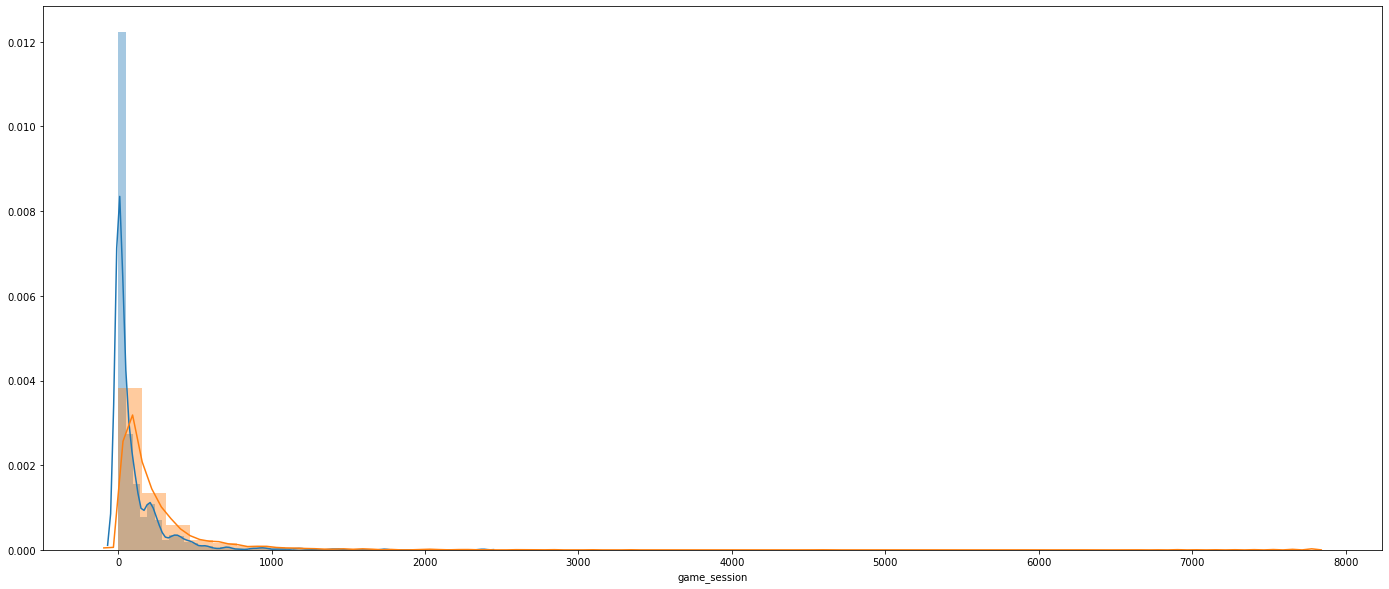

In [197]:
plotdata = testset[testset['type'] == 'Assessment'].groupby('installation_id')['game_session'].count().to_frame()
plotdata = plotdata.reset_index()
plotdata2 = temp.groupby('installation_id')['game_session'].count().to_frame()
plotdata2 = plotdata2.reset_index()


# plot the distribution of number of game_sessions
plotdata2.game_session.mean()
fig, ax = plt.subplots(figsize=(24,10))
ax = sns.distplot(plotdata.game_session)
ax = sns.distplot(plotdata2.game_session)
# plot the distribution of number of game_sessions
plotdata.game_session.mean()
# average of 102
# is this distribution the same in the trainset?
# well, almost similiar,but training set have much more examples with close to few game sessions.

In [180]:
# check the 2000 cases in the testset?
plotdata[plotdata['game_session'] > 2000]
testset[(testset['installation_id'] == '56a739ec') & (testset['type'] == 'Assessment')]
# probably shared devise, or just long captured times

,installation_id,game_session
321,56a739ec,2377


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
362085,3bfd1a65,2d6b7ae042ede0c6,2019-07-26T15:10:39.193Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",56a739ec,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362086,db02c830,2d6b7ae042ede0c6,2019-07-26T15:10:39.663Z,"{""event_count"":2,""game_time"":449,""event_code"":...",56a739ec,2,2025,449,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362087,a1e4395d,2d6b7ae042ede0c6,2019-07-26T15:10:39.697Z,"{""description"":""Pull three mushrooms out of th...",56a739ec,3,3010,449,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362088,a52b92d5,2d6b7ae042ede0c6,2019-07-26T15:10:43.821Z,"{""description"":""Pull three mushrooms out of th...",56a739ec,4,3110,4887,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362089,a1e4395d,2d6b7ae042ede0c6,2019-07-26T15:10:43.834Z,"{""description"":""To pick a mushroom, pull it ou...",56a739ec,5,3010,4887,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362090,a52b92d5,2d6b7ae042ede0c6,2019-07-26T15:10:46.598Z,"{""description"":""To pick a mushroom, pull it ou...",56a739ec,6,3110,7670,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362091,25fa8af4,2d6b7ae042ede0c6,2019-07-26T15:10:50.868Z,"{""correct"":false,""stumps"":[0,0,0],""event_count...",56a739ec,7,4100,11908,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362092,160654fd,2d6b7ae042ede0c6,2019-07-26T15:10:50.877Z,"{""description"":""Drag the mushrooms to the tree...",56a739ec,8,3020,11908,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362093,88d4a5be,2d6b7ae042ede0c6,2019-07-26T15:10:52.848Z,"{""description"":""Drag the mushrooms to the tree...",56a739ec,9,3120,13919,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
362094,28ed704e,2d6b7ae042ede0c6,2019-07-26T15:10:54.279Z,"{""height"":5,""coordinates"":{""x"":433,""y"":500,""st...",56a739ec,10,4025,15337,Mushroom Sorter (Assessment),Assessment,TREETOPCITY


In [ ]:
# OK, now we kind of understand this dataset.
# we may have multiple ways to approach this problem.
# 1. can we use the previous events in the testset?
# in my understanding, yes we can. the pevents in testset should construct an input of the model.
# how to pick construct the train/valid set?
# 1. reconstruct the train_label set by adding no 4110 game_sessions.
# 2. sorted by time,pick the last game session as the results of prediction.
# ok i think it's good enough

## first, do some cleaning of trainingset

In [114]:
def train_clean(train,testset):
    # only Assessment is considered
    df_train = train[train['type'] == 'Assessment']
    return df_train


In [115]:
temp = train_clean(train)

In [118]:
tt = temp.head(10000)

In [120]:
tt.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2185,3bfd1a65,901acc108f55a5a1,2019-08-06T05:22:01.344Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2186,db02c830,901acc108f55a5a1,2019-08-06T05:22:01.400Z,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2187,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:01.403Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2188,a52b92d5,901acc108f55a5a1,2019-08-06T05:22:05.242Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2189,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:05.244Z,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY


In [119]:
tt.groupby(['installation_id','game_session']).count()

event_id  timestamp  event_data  \
installation_id game_session                                        
0006a69f        6bdf9623adc94d89        35         35          35   
                77b8ee947eb84b4e        87         87          87   
                901acc108f55a5a1        48         48          48   
                9501794defd84e4d        42         42          42   
                a9ef3ecb3d1acc6a        32         32          32   
                e7e7db2a241eadcc        17         17          17   
0006c192        197a373a77101924        24         24          24   
                5f4c5e8c961afcf9         3          3           3   
                957406a905d59afd       200        200         200   
                b2297d292892745a       116        116         116   
00129856        34abf0a24c2aaf91         3          3           3   
                ae691ec5ad5652cf        40         40          40   
001d0ed0        55b75073d7a1b491         8          8           8   
                7b536271e99518f0        51         51          51   
                8fdd5d389d0e272e        29         29          29   
                9480b026e3e7d371        13         13          13   
                c046a858e7c8bf03        64         64          64   
                dc6bc0284039c9fb        37         37          37   
00225f67        36e19d45771e91b4        28         28          28   
                619b9c069cf790ca        37         37          37   
00279ac5        346d5f57cf40bac0       135        135         135   
                422faba8c6f8c081         5          5           5   
002db7e3        03e73cfb40d8d204        47         47          47   
                113a557b60770369        35         35          35   
                1c48bdca76efc7b0        38         38          38   
                470a1bd6b99152a7        26         26          26   
                5025f22d6e944533        57         57          57   
                67f9274eb736ab3f        52         52          52   
                8f50f2fd987cade4        46         46          46   
                acf50980a62ca93a        13         13          13   
...                                    ...        ...         ...   
02875dc2        278cc33cb108a989        18         18          18   
                ea25fa79f1461b1f        32         32          32   
0293ae74        58fc97ef3490dc88        41         41          41   
                5a585c48cabb5579        28         28          28   
                68311bca12c85522        88         88          88   
                6a099afa007b0d4a        41         41          41   
02aa515f        2a9be726af3ebd97        47         47          47   
                402aeeecf34d68fc        18         18          18   
                a54f6bbbdac3827c        53         53          53   
                b5a9bef83f89b4ba       183        183         183   
                d1228ecb363467b7        44         44          44   
                d5b087b6a1dd89ee        52         52          52   
02b1fab4        04ae6595177fddcb        35         35          35   
                094e1b8a5460b027        34         34          34   
                0f162fdab2e2c86c        37         37          37   
                1593e825018cafe7        37         37          37   
                1dd4c241487c453f        35         35          35   
                3351196298c8e1a7        30         30          30   
                611cecf2a9f4d6a8        29         29          29   
                6aec1d5b2318ae18        28         28          28   
                fa16cfe02f887b22        29         29          29   
02c975bc        08b0844e29327b31        30         30          30   
                2b1d065fac9072ac        34         34          34   
                500f5977f28dd07d        30         30          30   
                51f59746e00c99e1        38         38          38   
                5b48300e6b8c1d8b

In [83]:
train_labels[train_labels['installation_id'] == '0006a69f']

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [104]:
train[(train['installation_id'] == '0006a69f') & (train['type'] == 'Assessment')]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2185,3bfd1a65,901acc108f55a5a1,2019-08-06T05:22:01.344Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2186,db02c830,901acc108f55a5a1,2019-08-06T05:22:01.400Z,"{""event_count"":2,""game_time"":37,""event_code"":2...",0006a69f,2,2025,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2187,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:01.403Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,3,3010,37,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2188,a52b92d5,901acc108f55a5a1,2019-08-06T05:22:05.242Z,"{""description"":""Pull three mushrooms out of th...",0006a69f,4,3110,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2189,a1e4395d,901acc108f55a5a1,2019-08-06T05:22:05.244Z,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,5,3010,3901,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2190,28ed704e,901acc108f55a5a1,2019-08-06T05:22:07.812Z,"{""height"":4,""coordinates"":{""x"":329,""y"":550,""st...",0006a69f,6,4025,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2191,a52b92d5,901acc108f55a5a1,2019-08-06T05:22:07.812Z,"{""description"":""To pick a mushroom, pull it ou...",0006a69f,7,3110,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2192,9d29771f,901acc108f55a5a1,2019-08-06T05:22:07.816Z,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,8,3021,6475,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2193,c74f40cd,901acc108f55a5a1,2019-08-06T05:22:08.427Z,"{""description"":""That's one!"",""identifier"":""Dot...",0006a69f,9,3121,7084,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2194,28ed704e,901acc108f55a5a1,2019-08-06T05:22:09.742Z,"{""height"":1,""coordinates"":{""x"":176,""y"":526,""st...",0006a69f,10,4025,8400,Mushroom Sorter (Assessment),Assessment,TREETOPCITY


In [24]:
train.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [78]:
x = train[train['game_session'] == '77b8ee947eb84b4e']

In [82]:
x[x['event_code'] == 4110].event_data.count()

11

In [15]:
train_labels[train_labels['game_session'] == '77b8ee947eb84b4e']

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0


In [7]:
with open('test.csv') as f:
    testset = pd.read_csv(f)

In [105]:
testset[testset['installation_id'] == '240b4d74']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
159956,27253bdc,16091e79aa6ccaf4,2019-09-05T16:35:14.177Z,"{""event_code"": 2000, ""event_count"": 1}",240b4d74,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
159957,27253bdc,2dc8df1f85564803,2019-09-05T16:35:43.944Z,"{""event_code"": 2000, ""event_count"": 1}",240b4d74,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
159958,27253bdc,061c1fb9c8fa48d5,2019-09-05T16:36:36.477Z,"{""event_code"": 2000, ""event_count"": 1}",240b4d74,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
159959,90d848e0,62a040bfaf8cfb49,2019-09-05T16:37:46.737Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",240b4d74,1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK


In [112]:
testset[(testset['installation_id'] == '01242218') & (testset['type'] == 'Assessment')]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1547,90d848e0,009c890ce6c4f3e3,2019-09-22T21:23:06.296Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",01242218,1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1548,923afab1,009c890ce6c4f3e3,2019-09-22T21:23:06.641Z,"{""description"":""Put the right sized bucket und...",01242218,2,3010,390,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1549,532a2afb,009c890ce6c4f3e3,2019-09-22T21:23:06.644Z,"{""buckets"":[3,2,1],""target_bucket"":0,""mode"":""p...",01242218,3,2020,390,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1550,3ee399c3,009c890ce6c4f3e3,2019-09-22T21:23:09.263Z,"{""coordinates"":{""x"":510,""y"":758,""stage_width"":...",01242218,4,4070,3007,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1551,37ee8496,009c890ce6c4f3e3,2019-09-22T21:23:10.588Z,"{""bucket"":2,""buckets"":[3,0,1],""coordinates"":{""...",01242218,5,4030,4324,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1552,2dcad279,009c890ce6c4f3e3,2019-09-22T21:23:11.279Z,"{""description"":""Put the right sized bucket und...",01242218,6,3110,5040,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1553,30614231,009c890ce6c4f3e3,2019-09-22T21:23:11.303Z,"{""bucket"":2,""destination"":""middle"",""coordinate...",01242218,7,4020,5057,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1554,37ee8496,009c890ce6c4f3e3,2019-09-22T21:23:12.641Z,"{""bucket"":3,""buckets"":[0,0,1],""coordinates"":{""...",01242218,8,4030,6374,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1555,30614231,009c890ce6c4f3e3,2019-09-22T21:23:12.885Z,"{""bucket"":3,""destination"":""left"",""coordinates""...",01242218,9,4020,6641,Cauldron Filler (Assessment),Assessment,MAGMAPEAK
1556,37ee8496,009c890ce6c4f3e3,2019-09-22T21:23:13.823Z,"{""bucket"":1,""buckets"":[0,0,0],""coordinates"":{""...",01242218,10,4030,7557,Cauldron Filler (Assessment),Assessment,MAGMAPEAK


In [48]:
train[train['installation_id'] == '01242218']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world


In [52]:
t1 = train['installation_id'].unique()
t2 = testset['installation_id'].unique()

In [56]:
np.intersect1d(t1,t2)

array([], dtype=object)

In [106]:
train_labels.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [108]:
train_labels.size

123830

In [198]:
train['installation_id','game_session'].groupby(['installation_id','game_session']).count()

event_id  timestamp  event_data  \
installation_id game_session                                        
0001e90f        04168b61c0650977         1          1           1   
                07bacda7f9437b38       142        142         142   
                0848ef14a8dc6892       267        267         267   
                091587ed87b9637c         1          1           1   
                17eeb7f223665f53         1          1           1   
                3fce4f09769ff0b7         1          1           1   
                45bb1e1b6b50c07b         1          1           1   
                a1ec58f109218255        93         93          93   
                ca8b415f34d12873       109        109         109   
                f11eb823348bfa23       741        741         741   
000447c4        07c3b22b2de3ce4d        54         54          54   
                29e13e52832f050b         1          1           1   
                356348f67a1dfb26       124        124         124   
                59853815b928cf00         1          1           1   
                ae1944d61cbae05e         1          1           1   
0006a69f        0336db4dee65ad4b       131        131         131   
                05921a6eb858eeba        84         84          84   
                0721802df0531701        15         15          15   
                09fd0cc02e6ee5f4         1          1           1   
                1623f262016185e4        64         64          64   
                1dd51df3dd28e7e0         1          1           1   
                203959bf44d06632       133        133         133   
                239576a91af9fd4d        59         59          59   
                2420f6ca78dd10f5         1          1           1   
                2b9d5af79bcdb79f       102        102         102   
                2d99786f2b165871         1          1           1   
                2ecc82dcd2847233       204        204         204   
                3422611c17545edd        90         90          90   
                343d01f40e4616dc         1          1           1   
                34ba1a28d02ba8ba         1          1           1   
...                                    ...        ...         ...   
fff70c1e        bc8a9b0a9f40839f        40         40          40   
                d62cd851852ebd28         1          1           1   
                d72b5f6336ed8608         1          1           1   
fff744ce        93e805eeda03498d         1          1           1   
                c8d0a788c23ac1f7         1          1           1   
                e5e02cb6a3bf0465         1          1           1   
fff944d5        200affea076889c9         1          1           1   
                22b1aa938703f1f1        70         70          70   
                5183e88ad489a8c2         1          1           1   
                694638dec2a2dddf         1          1           1   
                716bc389c62cd32d        98         98          98   
                dcf6390f7d5b5fa5         1          1           1   
                f73aa5a845874e48         1          1           1   
fffc0583        2267b18f069e875a         1          1           1   
                296bbd1020fd4523         1          1           1   
                29e06ac52cbd1b9c         1          1           1   
                6ad8ab25003ef1b0         1          1           1   
                71904dca23b982c6         1          1           1   
                7dcd4c8c7d07a710         1          1           1   
                993fd8df909d78df         1          1           1   
                99f75aeef8614ca5         1          1           1   
                a0696d12d3d04f88         1          1           1   
                aae9fb7410f97210        80         80          80   
                b4d864e5a2e0ce13        39         39          39   
                b5812175588a247c        53         53          53   
                c09b94eebfdf50a6

In [205]:
ttt = train.loc[:,['installation_id','game_session']].groupby('installation_id').count()
inremove = ttt[ttt['game_session'] == 1].index

In [211]:
inremove
ttt.index

Index(['002c8bae', '0034471d', '003a6dff', '00524526', '00681329', '00f502d7',
       '00f76edc', '01031768', '01151be1', '0140c2eb',
       ...
       'fe6951c4', 'fe8f03eb', 'fef0f863', 'ff209f81', 'ff3a1cf3', 'ff848672',
       'ff9b374e', 'ff9de46c', 'ffb2c879', 'ffc237d4'],
      dtype='object', name='installation_id', length=1179)

Index(['0001e90f', '000447c4', '0006a69f', '0006c192', '0009a5a9', '0011edc8',
       '00129856', '0016b7cc', '00195df7', '001d0ed0',
       ...
       'ffeb0b1b', 'ffecb712', 'ffee81ed', 'fff169ef', 'fff45f15', 'fff64664',
       'fff70c1e', 'fff744ce', 'fff944d5', 'fffc0583'],
      dtype='object', name='installation_id', length=17000)

In [221]:
train[train['installation_id'].isin(inremove)]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
17546,27253bdc,d01386a6f8e13560,2019-10-12T04:25:14.697Z,"{""event_code"": 2000, ""event_count"": 1}",002c8bae,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
22841,27253bdc,d015574fc114695a,2019-09-12T03:07:17.686Z,"{""event_code"": 2000, ""event_count"": 1}",0034471d,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
23933,27253bdc,aac6ce4e9a2711e9,2019-08-18T22:00:38.467Z,"{""event_code"": 2000, ""event_count"": 1}",003a6dff,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
24888,27253bdc,d7fe0dba6f6e5ea9,2019-09-29T17:54:55.966Z,"{""event_code"": 2000, ""event_count"": 1}",00524526,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
26111,27253bdc,e224b7be42082372,2019-08-30T13:09:37.493Z,"{""event_code"": 2000, ""event_count"": 1}",00681329,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
47478,27253bdc,c0f40fefe4fce2ba,2019-09-27T16:23:10.513Z,"{""event_code"": 2000, ""event_count"": 1}",00f502d7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
47479,27253bdc,c9a67b94c1a87488,2019-09-07T02:34:51.793Z,"{""event_code"": 2000, ""event_count"": 1}",00f76edc,1,2000,0,Ordering Spheres,Clip,TREETOPCITY
59710,27253bdc,bb830bf94c69c735,2019-09-30T09:25:29.509Z,"{""event_code"": 2000, ""event_count"": 1}",01031768,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
61476,27253bdc,b6c242181c560726,2019-07-24T08:46:31.437Z,"{""event_code"": 2000, ""event_count"": 1}",01151be1,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
62191,27253bdc,84662926dc98322d,2019-10-11T14:38:28.594Z,"{""event_code"": 2000, ""event_count"": 1}",0140c2eb,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE


In [223]:
astrain = train[train['type'] == 'Assessment']
othertrain = train[train['type'] != 'Assessment']

In [226]:
astrain.loc[:,['installation_id','game_session']].groupby('installation_id').count().sort_values('installation_id')
othertrain.loc[:,['installation_id','game_session']].groupby('installation_id').count().sort_values('installation_id')

,game_session
installation_id,
0006a69f,261
0006c192,343
00129856,43
001d0ed0,202
00225f67,65
00279ac5,140
002db7e3,474
003372b0,238
004c2091,174


,game_session
installation_id,
0001e90f,1357
000447c4,181
0006a69f,3540
0006c192,1881
0009a5a9,412
0011edc8,63
00129856,787
0016b7cc,947
00195df7,248


In [230]:
astrain[astrain['installation_id'] == '000447c4']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world


In [231]:
train[train['installation_id'] == '000447c4']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
1357,27253bdc,ae1944d61cbae05e,2019-10-11T14:56:26.918Z,"{""event_code"": 2000, ""event_count"": 1}",000447c4,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1358,27253bdc,29e13e52832f050b,2019-10-11T14:57:28.823Z,"{""event_code"": 2000, ""event_count"": 1}",000447c4,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
1359,e64e2cfd,07c3b22b2de3ce4d,2019-10-11T14:58:16.480Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",000447c4,1,2000,0,Watering Hole (Activity),Activity,MAGMAPEAK
1360,49ed92e9,07c3b22b2de3ce4d,2019-10-11T14:58:16.838Z,"{""description"":""These dinosaurs are awfully th...",000447c4,2,3010,67,Watering Hole (Activity),Activity,MAGMAPEAK
1361,bd701df8,07c3b22b2de3ce4d,2019-10-11T14:58:23.762Z,"{""description"":""These dinosaurs are awfully th...",000447c4,3,3110,7317,Watering Hole (Activity),Activity,MAGMAPEAK
1362,f50fc6c1,07c3b22b2de3ce4d,2019-10-11T14:58:28.188Z,"{""cloud"":""middle"",""cloud_size"":3,""event_count""...",000447c4,4,4021,11732,Watering Hole (Activity),Activity,MAGMAPEAK
1363,f50fc6c1,07c3b22b2de3ce4d,2019-10-11T14:58:28.763Z,"{""cloud"":""right"",""cloud_size"":2,""event_count"":...",000447c4,5,4021,12315,Watering Hole (Activity),Activity,MAGMAPEAK
1364,49ed92e9,07c3b22b2de3ce4d,2019-10-11T14:58:28.848Z,"{""description"":""Looks like there's no water le...",000447c4,6,3010,12401,Watering Hole (Activity),Activity,MAGMAPEAK
1365,bd701df8,07c3b22b2de3ce4d,2019-10-11T14:58:34.575Z,"{""description"":""Looks like there's no water le...",000447c4,7,3110,18117,Watering Hole (Activity),Activity,MAGMAPEAK
1366,49ed92e9,07c3b22b2de3ce4d,2019-10-11T14:58:34.578Z,"{""description"":""Tap the cloud to start the rai...",000447c4,8,3010,18117,Watering Hole (Activity),Activity,MAGMAPEAK
